In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import os
import requests
import credentials
import yfinance as yf

import requests
from bs4 import BeautifulSoup

import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression

# Data

# FFR

In [194]:
import os
import requests
import credentials


url = 'https://api.stlouisfed.org/fred/series/observations?series_id=EFFR&api_key=' + credentials.apikey + '&file_type=json'
response = requests.get(url)

data = response.json()
ffr = pd.DataFrame(data['observations'])

# cleanup
ffr = ffr[ffr.date > '2022-04-06']
ffr = ffr [['date', 'value']]
ffr = ffr.rename(columns = {'value': 'DFF', 'date': 'Date'})
ffr = ffr.reset_index(drop = True)
ffr.DFF = pd.to_numeric(ffr.DFF.str.replace(".", ""), errors='coerce')


# FFR Futures

In [195]:
# URL to scrape
url = 'https://www.cmegroup.com/markets/interest-rates/cme-fedwatch-tool.html'

In [196]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.common.action_chains import ActionChains
from selenium import webdriver
import time

driver = webdriver.Chrome(executable_path='C:/temp/chromedriver.exe')
driver.set_page_load_timeout(300)

driver.get("https://www.cmegroup.com/trading/interest-rates/countdown-to-fomc.html")

time.sleep(2)

driver.switch_to.frame(driver.find_element(By.TAG_NAME,"iframe"))
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(2)
element = driver.find_element(By.LINK_TEXT, "Downloads")
driver.execute_script("arguments[0].click();", element)

time.sleep(2)

links = driver.find_elements(By.TAG_NAME, "a")

data = {}
for link in links:
    data[link.text] = link.get_attribute('href')
    
driver.quit()

In [197]:
data

{'': 'https://cmegroup-tools.quikstrike.net/User/QuikStrikeView.aspx?viewitemid=IntegratedFedWatchTool&userId=lwolf&jobRole=&company=&companyType=&userId=lwolf&jobRole=&company=&companyType=&insid=92230762&qsid=160beef0-942a-4af8-93e8-45c7857933dc#',
 'Current': "javascript:__doPostBack('ctl00$MainContent$ucViewControl_IntegratedFedWatchTool$lbCurrent','')",
 'Compare': "javascript:__doPostBack('ctl00$MainContent$ucViewControl_IntegratedFedWatchTool$lbCompare','')",
 'Probabilities': "javascript:__doPostBack('ctl00$MainContent$ucViewControl_IntegratedFedWatchTool$lbPTree','')",
 'Historical': "javascript:__doPostBack('ctl00$MainContent$ucViewControl_IntegratedFedWatchTool$lbHistorical','')",
 'Downloads': "javascript:__doPostBack('ctl00$MainContent$ucViewControl_IntegratedFedWatchTool$lbDownloads','')",
 'Prior Hikes': "javascript:__doPostBack('ctl00$MainContent$ucViewControl_IntegratedFedWatchTool$lbMH','')",
 'Chart': "javascript:__doPostBack('ctl00$MainContent$ucViewControl_Integrat

In [198]:
reports = {}
for k,v in data.items():
    if '20' in k:
        reports[k] = v

In [199]:
dfs = {}
for key, url in reports.items():
    dfs[key] = pd.read_csv(url)
    dfs[key]['contract'] = key

In [200]:
for k,v in dfs.items():
    print(len(v))

164
196
230
252
252
252
252
252
243
186
186
147
88
88
22
0
0


In [201]:
len(dfs)

17

In [202]:
df = pd.concat([i for i in dfs.values()])

In [203]:
df.sort_values(by = 'Date', ascending = True)

,Date,(0-25),(25-50),(50-75),(75-100),(100-125),(125-150),(150-175),(175-200),(200-225),...,(1825-1850),(1850-1875),(1875-1900),(1900-1925),(1925-1950),(1950-1975),(1975-2000),(2000-2025),(2025-2050),(2050-2075)
175,01/03/2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,01/03/2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
175,01/03/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,01/03/2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,01/03/2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,12/30/2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
174,12/30/2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,12/30/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,12/30/2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [204]:
df = df[df['Date'].notna()]

In [205]:
rates = [i for i in df.columns if i != 'Date' and i != 'contract']

In [206]:
rateset = list(set(rates))

In [207]:
ratevals = []
for i in rates:
    a = i.replace('(', "").replace(")","").split('-')[0]
    if float(a) < 25:
        a = float(a) * 1000
    
    b = i.replace('(', "").replace(")","").split('-')[1]
    if float(b) < 25:
        b = float(b) * 1000

    val = (int(a) + int(b)) / 2
    ratevals.append(str(val))

In [208]:
rename = dict(zip(rates, ratevals))

In [209]:
ffr['Date'] =  pd.to_datetime(ffr['Date'], infer_datetime_format=True)
df['Date'] =  pd.to_datetime(df['Date'], infer_datetime_format=True)
df['contract'] =  pd.to_datetime(df['contract'], infer_datetime_format=True)

In [210]:
df.rename(columns = rename, inplace = True)

In [211]:
df.columns.sort_values()

Index(['1012.5', '1037.5', '1062.5', '1087.5', '1112.5', '112.5', '1137.5',
       '1162.5', '1187.5', '12.5', '1212.5', '1237.5', '1262.5', '1287.5',
       '1312.5', '1337.5', '1362.5', '137.5', '1387.5', '1412.5', '1437.5',
       '1462.5', '1487.5', '1512.5', '1537.5', '1562.5', '1587.5', '1612.5',
       '162.5', '1637.5', '1662.5', '1687.5', '1712.5', '1737.5', '1762.5',
       '1787.5', '1812.5', '1837.5', '1862.5', '187.5', '1887.5', '1912.5',
       '1937.5', '1962.5', '1987.5', '2012.5', '2037.5', '2062.5', '212.5',
       '237.5', '262.5', '287.5', '312.5', '337.5', '362.5', '37.5', '387.5',
       '412.5', '437.5', '462.5', '487.5', '512.5', '537.5', '562.5', '587.5',
       '612.5', '62.5', '637.5', '662.5', '687.5', '712.5', '737.5', '762.5',
       '787.5', '812.5', '837.5', '862.5', '87.5', '887.5', '912.5', '937.5',
       '962.5', '987.5', 'Date', 'contract'],
      dtype='object')

In [212]:
df = df.reindex(sorted(df.columns), axis=1)

In [213]:
df = df.join(ffr.set_index('Date'), on='Date')

In [214]:
df.sort_values(by = 'Date', ascending = True)

,1012.5,1037.5,1062.5,1087.5,1112.5,112.5,1137.5,1162.5,1187.5,12.5,...,862.5,87.5,887.5,912.5,937.5,962.5,987.5,Date,contract,DFF
0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2022-04-22,2022-12-14,33.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-04-22,2023-06-14,33.0
0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-04-22,2023-03-22,33.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-04-22,2023-07-26,33.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-04-22,2023-09-20,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-21,2023-07-26,NaN
146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-04-21,2024-05-01,NaN
251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-21,2023-06-14,NaN
87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-04-21,2024-07-31,NaN


# BTC

In [215]:
from datetime import date

today = date.today().strftime("%Y-%m-%d")
print(today)

btc = yf.download('BTC-USD', start='2022-04-07', end=today)

2023-04-22
[*********************100%***********************]  1 of 1 completed


In [216]:
btc.drop(columns = [i for i in btc.columns if i != 'Open' and i!= 'Volume'], inplace = True)

In [217]:
btc.rename(columns = {'Open': 'btcopen', 'Volume':'btcvolume'}, inplace = True)

In [218]:
df

,1012.5,1037.5,1062.5,1087.5,1112.5,112.5,1137.5,1162.5,1187.5,12.5,...,862.5,87.5,887.5,912.5,937.5,962.5,987.5,Date,contract,DFF
0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2022-04-22,2022-12-14,33.0
1,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2022-04-25,2022-12-14,33.0
2,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2022-04-26,2022-12-14,33.0
3,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2022-04-27,2022-12-14,33.0
4,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2022-04-28,2022-12-14,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-04-17,2024-09-25,483.0
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-04-18,2024-09-25,483.0
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-04-19,2024-09-25,483.0
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-04-20,2024-09-25,483.0


In [219]:
btc['Date'] =  pd.to_datetime(btc.index, infer_datetime_format=True)

In [220]:
df = df.join(btc.set_index('Date'), on='Date')

In [221]:
df[df.Date == '2023-03-07']

,1012.5,1037.5,1062.5,1087.5,1112.5,112.5,1137.5,1162.5,1187.5,12.5,...,887.5,912.5,937.5,962.5,987.5,Date,contract,DFF,btcopen,btcvolume
218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2023-03-07,2023-03-22,457.0,22428.322266,22765452204
218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2023-03-07,2023-05-03,457.0,22428.322266,22765452204
218,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2023-03-07,2023-06-14,457.0,22428.322266,22765452204
218,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,NaN,2023-03-07,2023-07-26,457.0,22428.322266,22765452204
218,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,2023-03-07,2023-09-20,457.0,22428.322266,22765452204
218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2023-03-07,2023-11-01,457.0,22428.322266,22765452204
209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2023-03-07,2023-12-13,457.0,22428.322266,22765452204
152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2023-03-07,2024-01-31,457.0,22428.322266,22765452204
152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2023-03-07,2024-03-20,457.0,22428.322266,22765452204
113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2023-03-07,2024-05-01,457.0,22428.322266,22765452204


In [222]:
df.contract.value_counts()

2023-05-03    252
2023-06-14    252
2023-07-26    252
2023-09-20    252
2023-11-01    252
2023-12-13    243
2023-03-22    230
2023-02-01    196
2024-01-31    186
2024-03-20    186
2022-12-14    164
2024-05-01    147
2024-06-19     88
2024-07-31     88
2024-09-25     22
Name: contract, dtype: int64

In [223]:
for i in df.iloc[:, :83].columns:
    i = float(i)

In [224]:
df['Date'] =  pd.to_datetime(df['Date'], infer_datetime_format=True)

In [225]:
df.iloc[:, :83] = df.iloc[:, :83].applymap(pd.to_numeric, errors='coerce')

In [226]:
df.columns = [float(i) if isinstance(i, str) and i in ratevals else i for i in df.columns]

In [227]:
ratevals = [float(i) for i in ratevals]

In [228]:
df['mean'] = df[ratevals].apply(lambda x: x*df[ratevals].columns.values, axis=1).sum(axis=1)

In [229]:
df.sort_values(by = 'mean', ascending = False)

,1012.5,1037.5,1062.5,1087.5,1112.5,112.5,1137.5,1162.5,1187.5,12.5,...,912.5,937.5,962.5,987.5,Date,contract,DFF,btcopen,btcvolume,mean
219,0.0,0.0,0.0,0.0,NaN,0.000000,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,2023-03-08,2023-09-20,457.0,22216.441406,22536575684,575.154775
219,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,NaN,2023-03-08,2023-07-26,457.0,22216.441406,22536575684,573.154775
218,0.0,0.0,0.0,0.0,NaN,0.000000,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,2023-03-07,2023-09-20,457.0,22428.322266,22765452204,570.939938
219,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2023-03-08,2023-11-01,457.0,22216.441406,22536575684,570.036700
218,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,NaN,2023-03-07,2023-07-26,457.0,22428.322266,22765452204,568.940475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,2022-05-26,2022-12-14,83.0,29564.777344,36774325352,270.060137
25,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,2022-05-27,2022-12-14,83.0,29251.140625,36582005748,269.988950
1,0.0,0.0,0.0,0.0,0.0,0.000031,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2022-07-29,2024-01-31,232.0,23845.212891,35887249746,269.500312
0,0.0,0.0,0.0,0.0,0.0,0.000033,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2022-07-28,2024-03-20,233.0,22933.640625,40212386158,268.791337


In [230]:
df

,1012.5,1037.5,1062.5,1087.5,1112.5,112.5,1137.5,1162.5,1187.5,12.5,...,912.5,937.5,962.5,987.5,Date,contract,DFF,btcopen,btcvolume,mean
0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,2022-04-22,2022-12-14,33.0,40525.863281,28011716745,287.250338
1,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,2022-04-25,2022-12-14,33.0,39472.605469,35445730570,277.749712
2,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,2022-04-26,2022-12-14,33.0,40448.421875,34569088416,273.499925
3,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,2022-04-27,2022-12-14,33.0,38120.300781,30981015184,274.499950
4,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,2022-04-28,2022-12-14,33.0,39241.429688,33903704907,278.999950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2023-04-17,2024-09-25,483.0,30317.146484,17872186762,326.999762
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2023-04-18,2024-09-25,483.0,29449.091797,19480529496,327.999900
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2023-04-19,2024-09-25,483.0,30394.187500,24571565421,337.000962
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2023-04-20,2024-09-25,483.0,28823.683594,21340360360,323.499850


In [231]:
df.iloc[:, 83:89]

,Date,contract,DFF,btcopen,btcvolume,mean
0,2022-04-22,2022-12-14,33.0,40525.863281,28011716745,287.250338
1,2022-04-25,2022-12-14,33.0,39472.605469,35445730570,277.749712
2,2022-04-26,2022-12-14,33.0,40448.421875,34569088416,273.499925
3,2022-04-27,2022-12-14,33.0,38120.300781,30981015184,274.499950
4,2022-04-28,2022-12-14,33.0,39241.429688,33903704907,278.999950
...,...,...,...,...,...,...
17,2023-04-17,2024-09-25,483.0,30317.146484,17872186762,326.999762
18,2023-04-18,2024-09-25,483.0,29449.091797,19480529496,327.999900
19,2023-04-19,2024-09-25,483.0,30394.187500,24571565421,337.000962
20,2023-04-20,2024-09-25,483.0,28823.683594,21340360360,323.499850


In [232]:
smalldf = df.iloc[:, 83:89]

In [233]:
smalldf.dropna(inplace = True)

In [234]:
smalldf

,Date,contract,DFF,btcopen,btcvolume,mean
0,2022-04-22,2022-12-14,33.0,40525.863281,28011716745,287.250338
1,2022-04-25,2022-12-14,33.0,39472.605469,35445730570,277.749712
2,2022-04-26,2022-12-14,33.0,40448.421875,34569088416,273.499925
3,2022-04-27,2022-12-14,33.0,38120.300781,30981015184,274.499950
4,2022-04-28,2022-12-14,33.0,39241.429688,33903704907,278.999950
...,...,...,...,...,...,...
16,2023-04-14,2024-09-25,483.0,30409.562500,22659995079,315.500675
17,2023-04-17,2024-09-25,483.0,30317.146484,17872186762,326.999762
18,2023-04-18,2024-09-25,483.0,29449.091797,19480529496,327.999900
19,2023-04-19,2024-09-25,483.0,30394.187500,24571565421,337.000962


# Some Plotting

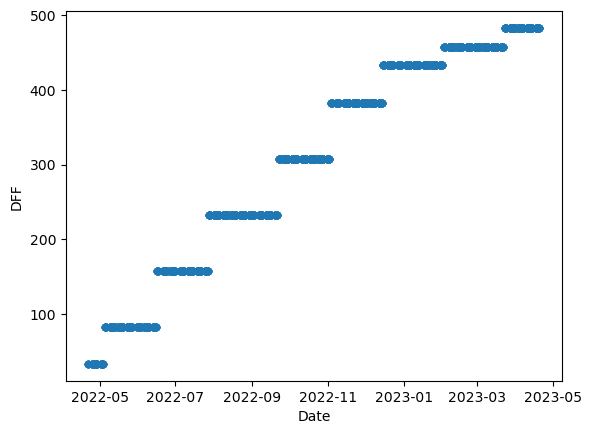

In [235]:
smalldf.plot.scatter('Date', 'DFF');

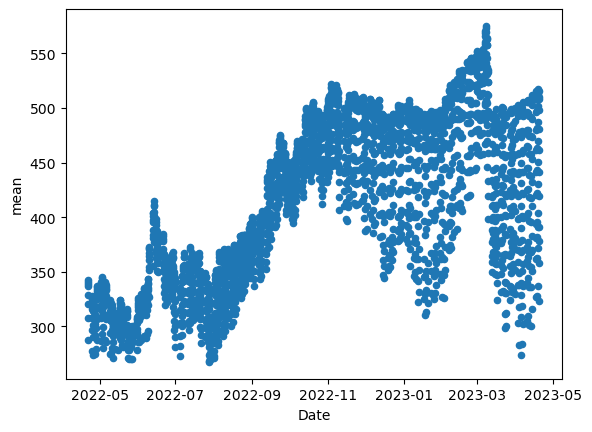

In [236]:
smalldf.plot.scatter('Date', 'mean');

In [237]:
new_df = df.pivot(index='Date', columns='contract', values='mean')

new_df = new_df.join(ffr.set_index('Date'), on='Date')

In [238]:
[i for i in new_df.columns if i != 'DFF']

[Timestamp('2022-12-14 00:00:00'),
 Timestamp('2023-02-01 00:00:00'),
 Timestamp('2023-03-22 00:00:00'),
 Timestamp('2023-05-03 00:00:00'),
 Timestamp('2023-06-14 00:00:00'),
 Timestamp('2023-07-26 00:00:00'),
 Timestamp('2023-09-20 00:00:00'),
 Timestamp('2023-11-01 00:00:00'),
 Timestamp('2023-12-13 00:00:00'),
 Timestamp('2024-01-31 00:00:00'),
 Timestamp('2024-03-20 00:00:00'),
 Timestamp('2024-05-01 00:00:00'),
 Timestamp('2024-06-19 00:00:00'),
 Timestamp('2024-07-31 00:00:00'),
 Timestamp('2024-09-25 00:00:00')]

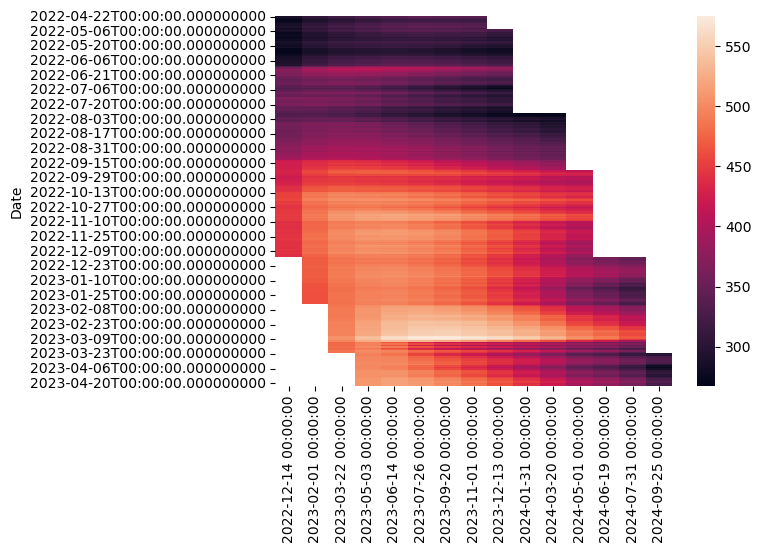

In [239]:
import seaborn as sns
sns.heatmap(new_df[[i for i in new_df.columns if i != 'DFF']]);

In [240]:
import plotly.graph_objects as go

In [241]:
x = [i for i in new_df.columns if i != 'DFF']
y = new_df.index
z = new_df.to_numpy()

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='FFR Curves',
                  width = 1200,
                  height = 1200,
                  scene = {"aspectratio": {"x": 1, "y": 1, "z": .6}})
fig.update_coloraxes(cauto=True)
#fig.update_coloraxes(cmax=2000)
#fig.update_coloraxes(cmin=2000)
fig.show()

# Cohorting

In [242]:
contractvals = sorted(list({i for i in df.contract}))

In [243]:
contractvals

[Timestamp('2022-12-14 00:00:00'),
 Timestamp('2023-02-01 00:00:00'),
 Timestamp('2023-03-22 00:00:00'),
 Timestamp('2023-05-03 00:00:00'),
 Timestamp('2023-06-14 00:00:00'),
 Timestamp('2023-07-26 00:00:00'),
 Timestamp('2023-09-20 00:00:00'),
 Timestamp('2023-11-01 00:00:00'),
 Timestamp('2023-12-13 00:00:00'),
 Timestamp('2024-01-31 00:00:00'),
 Timestamp('2024-03-20 00:00:00'),
 Timestamp('2024-05-01 00:00:00'),
 Timestamp('2024-06-19 00:00:00'),
 Timestamp('2024-07-31 00:00:00'),
 Timestamp('2024-09-25 00:00:00')]

In [244]:
smalldf2 = smalldf
smalldf2['dtm'] = (smalldf2.contract - smalldf2.Date)

In [245]:
smalldf2

,Date,contract,DFF,btcopen,btcvolume,mean,dtm
0,2022-04-22,2022-12-14,33.0,40525.863281,28011716745,287.250338,236 days
1,2022-04-25,2022-12-14,33.0,39472.605469,35445730570,277.749712,233 days
2,2022-04-26,2022-12-14,33.0,40448.421875,34569088416,273.499925,232 days
3,2022-04-27,2022-12-14,33.0,38120.300781,30981015184,274.499950,231 days
4,2022-04-28,2022-12-14,33.0,39241.429688,33903704907,278.999950,230 days
...,...,...,...,...,...,...,...
16,2023-04-14,2024-09-25,483.0,30409.562500,22659995079,315.500675,530 days
17,2023-04-17,2024-09-25,483.0,30317.146484,17872186762,326.999762,527 days
18,2023-04-18,2024-09-25,483.0,29449.091797,19480529496,327.999900,526 days
19,2023-04-19,2024-09-25,483.0,30394.187500,24571565421,337.000962,525 days


In [246]:
from datetime import datetime
smalldf2.dtm = smalldf2.dtm.dt.days

In [247]:
smalldf2.dtm

0     236
1     233
2     232
3     231
4     230
     ... 
16    530
17    527
18    526
19    525
20    524
Name: dtm, Length: 2774, dtype: int64

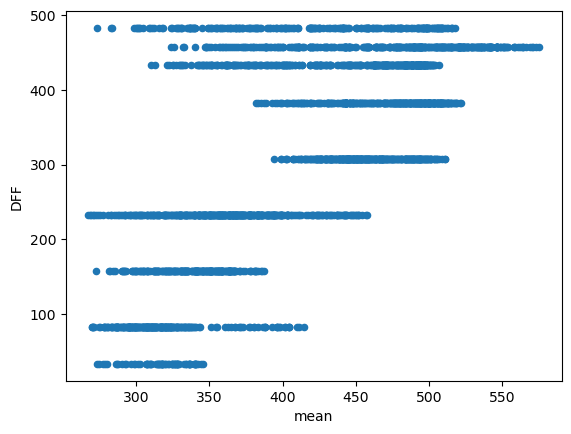

In [248]:
# useless
smalldf.plot.scatter('mean', 'DFF');

In [249]:
smalldf2['diff'] = smalldf2['mean'] - smalldf2.DFF

In [250]:
smalldf2

,Date,contract,DFF,btcopen,btcvolume,mean,dtm,diff
0,2022-04-22,2022-12-14,33.0,40525.863281,28011716745,287.250338,236,254.250338
1,2022-04-25,2022-12-14,33.0,39472.605469,35445730570,277.749712,233,244.749712
2,2022-04-26,2022-12-14,33.0,40448.421875,34569088416,273.499925,232,240.499925
3,2022-04-27,2022-12-14,33.0,38120.300781,30981015184,274.499950,231,241.499950
4,2022-04-28,2022-12-14,33.0,39241.429688,33903704907,278.999950,230,245.999950
...,...,...,...,...,...,...,...,...
16,2023-04-14,2024-09-25,483.0,30409.562500,22659995079,315.500675,530,-167.499325
17,2023-04-17,2024-09-25,483.0,30317.146484,17872186762,326.999762,527,-156.000238
18,2023-04-18,2024-09-25,483.0,29449.091797,19480529496,327.999900,526,-155.000100
19,2023-04-19,2024-09-25,483.0,30394.187500,24571565421,337.000962,525,-145.999038


In [251]:
smalldf2.dtypes

Date         datetime64[ns]
contract     datetime64[ns]
DFF                 float64
btcopen             float64
btcvolume             int64
mean                float64
dtm                   int64
diff                float64
dtype: object

In [252]:

import plotly.express as px
fig = px.scatter_3d(smalldf2, x='Date', y='contract', z='diff', color='mean', size='DFF')
fig.update_layout(title='spreads between FFR and expected FFR: by date, by contract',
                  width = 1200,
                  height = 1200,
                  scene = {"aspectratio": {"x": 1, "y": 1, "z": .6}})
fig.update_coloraxes(cauto=True)
fig.show()

In [253]:
# premium if you're buying the contract (more time you have (orange and yellow) premium for cost of time when you don't know future rates)

In [254]:
smalldf2.Date.dtype

dtype('<M8[ns]')

In [255]:
smalldf3 = smalldf2

In [256]:
smalldf3

,Date,contract,DFF,btcopen,btcvolume,mean,dtm,diff
0,2022-04-22,2022-12-14,33.0,40525.863281,28011716745,287.250338,236,254.250338
1,2022-04-25,2022-12-14,33.0,39472.605469,35445730570,277.749712,233,244.749712
2,2022-04-26,2022-12-14,33.0,40448.421875,34569088416,273.499925,232,240.499925
3,2022-04-27,2022-12-14,33.0,38120.300781,30981015184,274.499950,231,241.499950
4,2022-04-28,2022-12-14,33.0,39241.429688,33903704907,278.999950,230,245.999950
...,...,...,...,...,...,...,...,...
16,2023-04-14,2024-09-25,483.0,30409.562500,22659995079,315.500675,530,-167.499325
17,2023-04-17,2024-09-25,483.0,30317.146484,17872186762,326.999762,527,-156.000238
18,2023-04-18,2024-09-25,483.0,29449.091797,19480529496,327.999900,526,-155.000100
19,2023-04-19,2024-09-25,483.0,30394.187500,24571565421,337.000962,525,-145.999038


In [257]:
smalldf3

,Date,contract,DFF,btcopen,btcvolume,mean,dtm,diff
0,2022-04-22,2022-12-14,33.0,40525.863281,28011716745,287.250338,236,254.250338
1,2022-04-25,2022-12-14,33.0,39472.605469,35445730570,277.749712,233,244.749712
2,2022-04-26,2022-12-14,33.0,40448.421875,34569088416,273.499925,232,240.499925
3,2022-04-27,2022-12-14,33.0,38120.300781,30981015184,274.499950,231,241.499950
4,2022-04-28,2022-12-14,33.0,39241.429688,33903704907,278.999950,230,245.999950
...,...,...,...,...,...,...,...,...
16,2023-04-14,2024-09-25,483.0,30409.562500,22659995079,315.500675,530,-167.499325
17,2023-04-17,2024-09-25,483.0,30317.146484,17872186762,326.999762,527,-156.000238
18,2023-04-18,2024-09-25,483.0,29449.091797,19480529496,327.999900,526,-155.000100
19,2023-04-19,2024-09-25,483.0,30394.187500,24571565421,337.000962,525,-145.999038


In [258]:
smalldf3['diffrel'] = (smalldf3['mean'] - smalldf3['DFF'])/smalldf3['DFF']
smalldf3.diffrel = smalldf3.diffrel.round(3)

In [259]:

import plotly.express as px
fig = px.scatter_3d(smalldf2, x='Date', y='contract', z='diff', color='diffrel', size='DFF')
fig.update_layout(title='spreads between FFR and expected FFR: by date, by contract',
                  width = 1200,
                  height = 1200,
                  scene = {"aspectratio": {"x": 1, "y": 1, "z": .6}})
fig.update_coloraxes(cauto=True)
fig.show()

# Timeseries

In [260]:
def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    legend_list = []
    
    # Iterate through each column name.
    for col in cols:
            
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(smalldf2[col])
        legend_list.append(col)
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18)
    
    plt.legend(legend_list);

In [261]:
'''plot_series(smalldf2,
            ['btcopen'],
            title=" price",
            steps=50)
'''

'plot_series(smalldf2,\n            [\'btcopen\'],\n            title=" price",\n            steps=50)\n'

# Dickey Fuller

In [262]:
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:3], index=['Test Statistic','p-value', 'Lag Used'])
    return dfoutput

In [263]:
interpret_dftest(adfuller(smalldf2['btcopen']))

Test Statistic   -6.961149e+00
p-value           9.157681e-10
Lag Used          2.600000e+01
dtype: float64

# Regressions
This LR is just a placeholder, i don't respect the methodology

In [264]:
smalldf2

,Date,contract,DFF,btcopen,btcvolume,mean,dtm,diff,diffrel
0,2022-04-22,2022-12-14,33.0,40525.863281,28011716745,287.250338,236,254.250338,7.705
1,2022-04-25,2022-12-14,33.0,39472.605469,35445730570,277.749712,233,244.749712,7.417
2,2022-04-26,2022-12-14,33.0,40448.421875,34569088416,273.499925,232,240.499925,7.288
3,2022-04-27,2022-12-14,33.0,38120.300781,30981015184,274.499950,231,241.499950,7.318
4,2022-04-28,2022-12-14,33.0,39241.429688,33903704907,278.999950,230,245.999950,7.455
...,...,...,...,...,...,...,...,...,...
16,2023-04-14,2024-09-25,483.0,30409.562500,22659995079,315.500675,530,-167.499325,-0.347
17,2023-04-17,2024-09-25,483.0,30317.146484,17872186762,326.999762,527,-156.000238,-0.323
18,2023-04-18,2024-09-25,483.0,29449.091797,19480529496,327.999900,526,-155.000100,-0.321
19,2023-04-19,2024-09-25,483.0,30394.187500,24571565421,337.000962,525,-145.999038,-0.302


In [265]:
dummies = ['contract']

In [266]:
smalldf3 = pd.get_dummies(data = smalldf2, columns = dummies, drop_first = True)

In [267]:
xvars = [i for i in smalldf3.columns if i != 'btcopen' and i != 'Date']

In [268]:
X = smalldf3[xvars]
y = smalldf3['btcopen']

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [270]:
X_train = X[:2493]
X_test = X[2494:]
y_train = y[:2493]
y_test = y[2494:]

In [271]:
lr = LinearRegression()

lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.7572498085659312
-108.08539927696869


<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'> <class 'numpy.ndarray'>


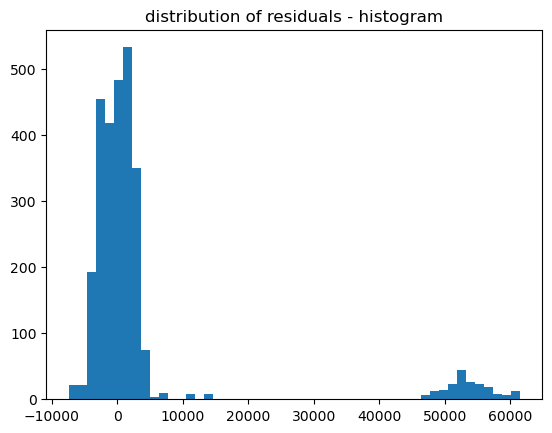

In [272]:
yhat = lr.predict(X)

residuals = y - yhat

plt.hist(residuals, bins = 50);
plt.title('distribution of residuals - histogram');
#residuals are.... kind of normal, mean is not 0

print(type(y), type(residuals), type(yhat))

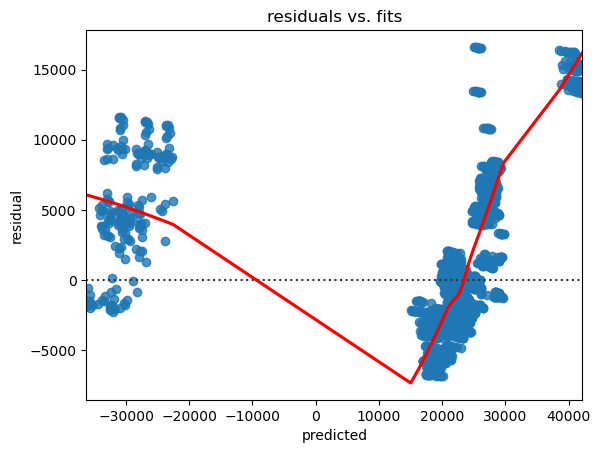

In [273]:
sns.residplot(x = yhat,
              y = residuals,
              lowess = True, 
              line_kws = {'color':'red'})\
    .set(title = 'residuals vs. fits',
        xlabel = 'predicted',
        ylabel = 'residual');

# hmm

In [275]:
# This is crazy what is up

In [281]:
smalldf3['yhat'] = yhat

In [287]:
# I see - the missed residuals are from backwardation period (april - mid may)
smalldf2[smalldf3.yhat > 40000].sort_values(by = 'Date')

,Date,contract,DFF,btcopen,btcvolume,mean,dtm,diff,diffrel
0,2022-04-22,2023-09-20,33.0,40525.863281,28011716745,340.749637,516,307.749637,9.326
0,2022-04-22,2023-06-14,33.0,40525.863281,28011716745,336.670025,418,303.670025,9.202
0,2022-04-22,2023-11-01,33.0,40525.863281,28011716745,339.249950,558,306.249950,9.280
0,2022-04-22,2023-03-22,33.0,40525.863281,28011716745,320.249662,334,287.249662,8.705
0,2022-04-22,2023-05-03,33.0,40525.863281,28011716745,328.777700,376,295.777700,8.963
0,2022-04-22,2023-07-26,33.0,40525.863281,28011716745,342.249613,460,309.249613,9.371
1,2022-04-25,2023-06-14,33.0,39472.605469,35445730570,322.790600,415,289.790600,8.782
1,2022-04-25,2023-09-20,33.0,39472.605469,35445730570,326.249925,513,293.249925,8.886
1,2022-04-25,2023-05-03,33.0,39472.605469,35445730570,315.774887,373,282.774887,8.569
1,2022-04-25,2023-11-01,33.0,39472.605469,35445730570,324.749850,555,291.749850,8.841
